In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\annak\Downloads\data.xlsx - Лист1.csv")

In [3]:
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,"11 693,70",ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,"5 452,70",ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,26.07.21
3,15.0,"13 991,70",ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,08.06.21
4,16.0,"719,7",ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,08.06.21


**Предобработка данных**

In [4]:
#лишний столбец 
df.drop(columns=['Unnamed: 5'], axis = 1, inplace = True)

Можно заметить довольно много пустых значений NaN. 

In [5]:
df.dropna()

,client_id,sum,status,sale,new/current,document,receiving_date
1,6.0,"11 693,70",ВНУТРЕННИЙ,-,-,-,-
2,14.0,"5 452,70",ОПЛАЧЕНО,Петрова,новая,оригинал,26.07.21
3,15.0,"13 991,70",ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21
4,16.0,"719,7",ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21
5,18.0,"4 253,70",ОПЛАЧЕНО,Иванов,текущая,оригинал,07.07.21
...,...,...,...,...,...,...,...
718,304.0,"2 803,70",ОПЛАЧЕНО,Андреев,текущая,оригинал,09.11.21
724,285.0,"3 453,70",ОПЛАЧЕНО,Васильев,текущая,оригинал,15.11.21
725,285.0,"4 328,70",ОПЛАЧЕНО,Васильев,текущая,оригинал,15.11.21
728,373.0,"4 403,70",ОПЛАЧЕНО,Михайлов,новая,оригинал,08.11.21


In [6]:
#строка не несет полезной информации, поэтому я ее удаляю
df.drop(labels = [0,1] , axis = 0, inplace = True)

In [7]:
df.dropna(axis = 0, subset=['receiving_date'], inplace = True)

Отформатирую столбец с датой

In [8]:
df['receiving_date'] = pd.to_datetime(df['receiving_date'])

**Ответы на вопросы.**

**1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.**

In [9]:
df_1 = df[(df['receiving_date'].dt.month == 7)&(df['receiving_date'].dt.year == 2021)]
df1 = df_1[df_1['status'] == 'ОПЛАЧЕНО']  

In [10]:
#перевод в столбца с платежами в численную переменную
def change_str_to_float(text):
    return float(text.replace('\xa0','').replace(',','.'))

In [11]:
df_1['sum'] = df_1['sum'].apply(change_str_to_float)

In [12]:
#df_1['sum'].unique()

ОТВЕТ:

In [13]:
df_1['sum'].sum()

590471.8199999997

**2)Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.**


In [14]:
import matplotlib.pyplot  as plt 

In [15]:
#сначала отсортирую по возрастанию даты
df_1.sort_values(by = 'receiving_date', ascending = True, inplace = True )

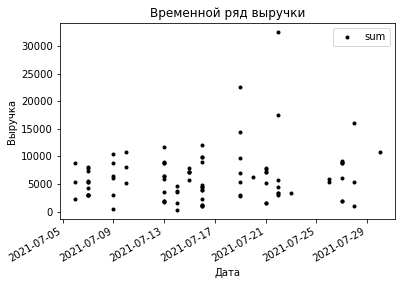

In [30]:
df_1.plot(x='receiving_date', y='sum', style='k.')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Временной ряд выручки')

plt.show()

In [18]:
import seaborn as sns 

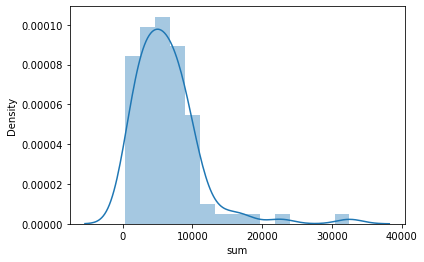

In [19]:
#распределение выручки 
sns_plot = sns.distplot(df_1['sum'])
fig = sns_plot.get_figure()

**3)Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?**


In [32]:
df_2 = df[(df['receiving_date'].dt.month == 9)&(df['receiving_date'].dt.year == 2021)]

In [33]:
df_2.sale.unique()

array(['Филимонова', 'Петрова', 'Кузнецова', 'Васильев', 'Иванов',
       'Смирнов', 'Соколов', 'Селиванов', 'Андреев'], dtype=object)

In [42]:
#перевод в столбца с платежами в численную переменную
def change_str_to_float(text):
    return float(text.replace('\xa0','').replace(',','.'))

In [43]:
df_2['sum'] = df_2['sum'].apply(change_str_to_float)

In [44]:
df_2.dtypes

client_id                float64
sum                      float64
status                    object
sale                      object
new/current               object
document                  object
receiving_date    datetime64[ns]
dtype: object

In [45]:
df_2.groupby(['sale']).agg('sum')

,client_id,sum
sale,,
Андреев,2632.0,105007.30
Васильев,1529.0,30971.90
Иванов,1454.0,152705.50
Кузнецова,755.0,56887.20
Петрова,3480.0,156486.02
Селиванов,382.0,15074.40
Смирнов,3794.0,174869.50
Соколов,1787.0,44234.60
Филимонова,789.0,42101.25


ОТВЕТ: Следовательно, больше всего в сентябре 2021 года денежных средств привлек менеджер с фамилией Смирнов. Он привлек в компанию 174869.50

**4)Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?**

In [34]:
df_4 = df[(df['receiving_date'].dt.month == 10)&(df['receiving_date'].dt.year == 2021)]

In [35]:
df_4[df_4['new/current'] == 'текущая'].count()

client_id         97
sum               97
status            97
sale              97
new/current       97
document          96
receiving_date    97
dtype: int64

In [36]:
df_4[df_4['new/current'] == 'новая'].count()

client_id         15
sum               15
status            15
sale              15
new/current       15
document          15
receiving_date    15
dtype: int64

ОТВЕТ: Преобладающим был тип сделок "текущий" в октябре 2021 года. Количество таких сделок составило 97.

**5)Сколько оригиналов договора по майским сделкам было получено в июне 2021?**

In [37]:
df_5 = df[(df['receiving_date'].dt.month == 6)&(df['receiving_date'].dt.year == 2021)]

In [38]:
df_5[df_5['document'] == 'оригинал'].count()

client_id         80
sum               80
status            80
sale              80
new/current       80
document          80
receiving_date    80
dtype: int64

ОТВЕТ: Было получено 80 оригиналов договоров.